<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/Gouped_bars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# PARAMETERS
csv_file = '/content/gr_TAC_all.csv' #"/content/lupin_PM_0602_ew.csv" #/content/lupina-params-1.csv

parameter = 'mean' # required column
#x_label = 'grass forage species' #'$\it{L.}$ $\it{albus}$ cultivars' # 'Chickpea ($\mathit{Cicer}$ $\it{arietinum}$) cultivars' # 'grass forage species' # 'L. albus cultivars' # 'Sorghum cultivars' # 'grass forage species' #

y_height = 40 # height of the graph
y_dist = 5 # distance between labels
title_main = 'DIo/RC'
y_label = '[mM /mg] AAE'

In [ ]:
import pandas as pd
import numpy as np
# exp_0726_OJIP_p
df = pd.read_csv(csv_file, delimiter='\t', decimal=',') # delimiter '\t' or ';'

In [ ]:
df

,species,month,method,index,mean,error
0,L. perenne,July,PM,1,11.220286,0.108708
1,L. perenne,July,FRAP,2,10.352204,0.449330
2,L. perenne,October,PM,3,7.072704,0.268147
3,L. perenne,October,FRAP,4,9.696062,3.136826
4,F. arundinacea,July,PM,5,10.818066,0.869666
5,F. arundinacea,July,FRAP,6,6.889722,0.916280
6,F. arundinacea,October,PM,7,4.815051,0.362361
7,F. arundinacea,October,FRAP,8,6.799372,0.821030
8,F. pratensis,July,PM,9,8.122101,0.108708
9,F. pratensis,July,FRAP,10,5.259801,0.881039


In [ ]:
import itertools as it
array1 = pd.unique(df['method'].values).tolist()
array2 = pd.unique(df['month'].values).tolist()
combinations = np.array(np.meshgrid(array2, array1)).T.reshape(-1, 2)

<ipython-input-179-3b95900dffb1>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y1 = df[df['month'] == 'July'][df['method'] == 'PM']['mean'].values
<ipython-input-179-3b95900dffb1>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y2 = df[df['month'] == 'July'][df['method'] == 'FRAP']['mean'].values
<ipython-input-179-3b95900dffb1>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y3 = df[df['month'] == 'October'][df['method'] == 'PM']['mean'].values
<ipython-input-179-3b95900dffb1>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y4 = df[df['month'] == 'October'][df['method'] == 'FRAP']['mean'].values
<ipython-input-179-3b95900dffb1>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y1err = df[df['month'] == 'July'][df['method'] == 'PM']['error'].values
<ipython-input-179-3b95900dffb1>:9: UserWarning: Boolean Series key will be 

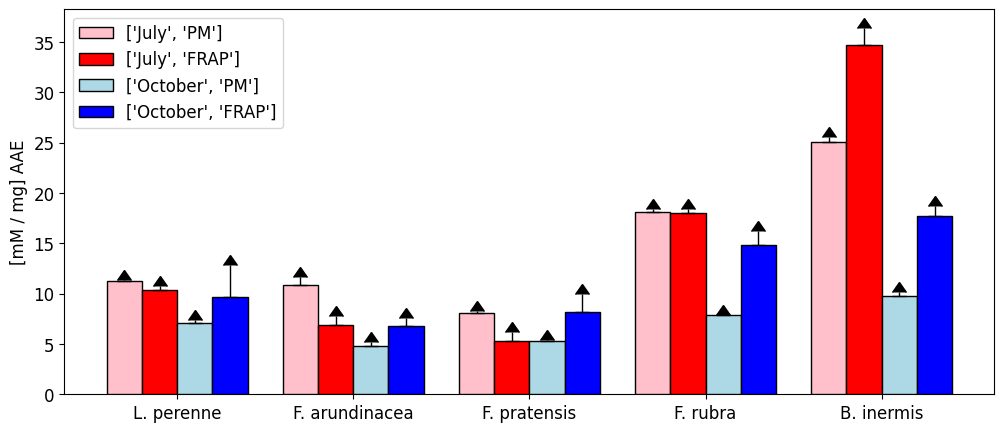

In [ ]:
import matplotlib.pyplot as plt
# create data
x = np.arange(5)
y1 = df[df['month'] == 'July'][df['method'] == 'PM']['mean'].values
y2 = df[df['month'] == 'July'][df['method'] == 'FRAP']['mean'].values
y3 = df[df['month'] == 'October'][df['method'] == 'PM']['mean'].values
y4 = df[df['month'] == 'October'][df['method'] == 'FRAP']['mean'].values
y1err = df[df['month'] == 'July'][df['method'] == 'PM']['error'].values
y2err = df[df['month'] == 'July'][df['method'] == 'FRAP']['error'].values
y3err = df[df['month'] == 'October'][df['method'] == 'PM']['error'].values
y4err = df[df['month'] == 'October'][df['method'] == 'FRAP']['error'].values

plt.figure(figsize=(12, 5))
bar_kwargs = {'width':0.2,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5,'capthick':1,'lolims':True}
# plot data in grouped manner of bar type
p1 = plt.bar(x-0.3, y1, color='pink', yerr=y1err, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(x-0.1, y2, color='red', yerr=y2err, **bar_kwargs,  error_kw=err_kwargs)
p3 = plt.bar(x+0.1, y3, color='lightblue', yerr=y3err, **bar_kwargs,  error_kw=err_kwargs)
p4 = plt.bar(x+0.3, y4, color='blue', yerr=y4err, **bar_kwargs,  error_kw=err_kwargs)

label = pd.unique(df['species'].values)
plt.rc('font', size=12)
plt.xticks(x, label, fontsize=12)

plt.ylabel('[mM / mg] AAE')
plt.legend((p1[1], p2, p3[0], p4[2]), combinations.tolist(), loc='upper left')



In [ ]:
'''
bar_kwargs = {'width':width,'linewidth':1,'zorder':5,'edgecolor':'black'}
err_kwargs = {'linewidth':1,'ecolor':'black','capsize':5, 'capthick':1}
fig, ax = plt.subplots()

p1 = plt.bar(ind, menMeans1, color='blue',
             yerr=menStd1, **bar_kwargs,  error_kw=err_kwargs)
p2 = plt.bar(ind, menMeans2, color='orange',
             bottom=menMeans1, yerr=menStd2, **bar_kwargs,  error_kw=err_kwargs)

ax.set(title=title_main, ylabel=y_label, xlabel=x_label)
plt.xticks(ind, labels, color='k')
ax.set_xticklabels(labels, fontsize=12
                   , style='italic', rotation=90)
plt.ylim(ymax=y_height)
y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=12)
plt.legend((p1[0], p2[0]), ('ethanol', 'water'))

fig.suptitle('')
plt.show()
'''